# Capstone Project - Linear Regression 

This is data prep for Linear Regression capstone poject, done during *2021 Python for Machine Learning & Data Science Masterclass* course from udemy- link below:

https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/

----
## Overview
ssss

----
## Goal:
**sssss**

----
## Parts of project:
1. Understanding the background and data.
2. Exploring SalePrice (target).
3. Exploring dependent variables.
4. Data preprocessing and feature engineering.
5. Assumptions for testing.
6. Modeling

----
----

# 1. Understanding the background and data.

## Dataset description 

Usefull links:
- [Original paper](http://jse.amstat.org/v19n3/decock.pdf)
- [Original dataset](http://jse.amstat.org/v19n3/decock/AmesHousing.txt)
- [Documentation of the data](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


Short description, [based from Kaggle:](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Loading the file with description**

In [84]:
with open('data/Ames_Housing_Feature_Description.txt','r') as f: 
    info = f.read()
    print(info)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Looking at the description we can assume that some features will have more impact on the **SalePrice**, then the another. So far, based only on thinking logically we can assume that:
* **OverallQual/OverallCond** will be important, as it measures the overall state and quality of house;
* **YearBuilt** in most cases will be important, because *usually* the newer the house is the higher the price is (there might be exceptions e.g. very old houses in a good state, almost like antiques);
* **GrLivArea** will be important as it describes the above ground living area and usually price is dictated by the square footage.

With that being said, we'll check that variables at first.

## Import libs, data quick description

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid')
# color for plots
color='darkslateblue'

In [86]:
# load dataset
AmesOriginal = pd.read_csv("data/Ames_Housing_Data.csv")

**Our target variable is <u>SalesPrice</u>.**

Basic info about the dataset below.

In [87]:
# shape - 2930 rows and 81 colums.
# names of columns - they are a bit messy, we will corect that in a moment.
# nulls -  we already see that some columns have a lot, different have less.
# data types - type of data in column(number of columns):
# float64(11), int64(27), object(43).
# first column PID - we may want to drop it or set it as an index
AmesOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [88]:
# before dropping ID, let's check if there are no duplicates
AmesOriginal[AmesOriginal.duplicated(subset=['PID'])]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [89]:
# if none, dropping PID
AmesDf = AmesOriginal.drop(columns='PID')

In [90]:
# list for new colnames
cols = []
for i in range(len(AmesDf.columns)):
    cols.append("".join(AmesDf.columns[i].split()))
# switching names
AmesDf.columns = cols
# seems fine
AmesDf.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

In [140]:
# Lets create categorical and numerical DF, as it may be useful later
AmesDfNum = AmesDf.select_dtypes(include=np.number)
AmesDfCat = AmesDf.select_dtypes(exclude=np.number)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# 2. Exploring SalePrice (target).

In [91]:
# basic info about taget variable
# The mean house price is approx. 180 k and deviates from the average of 80k.
# The cheapest house cost almost 13k, and the most expensive one cost 755k.
# 25% of all houses has price lower than 129.5k
# 150k is the median, so half of houses cost less and the other half cost more.
# 75 % of all houses has price lower than 213.5k
AmesDf['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

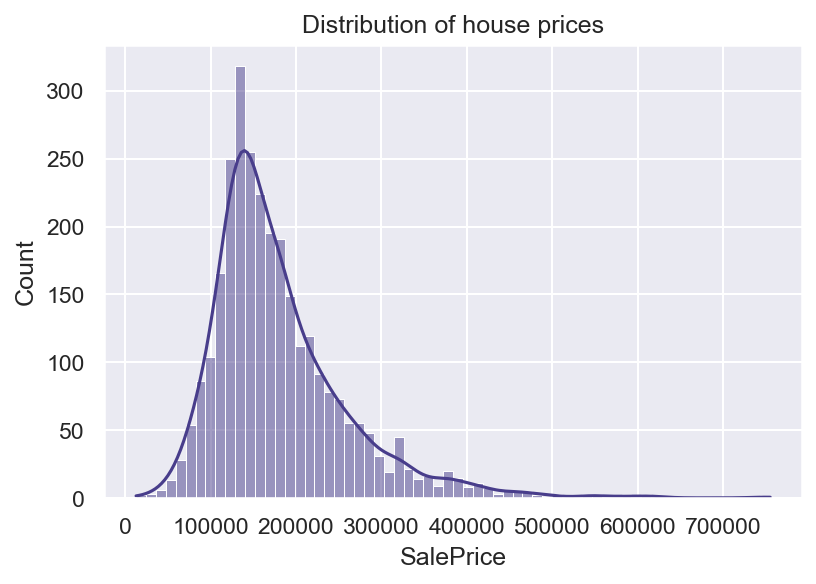

In [92]:
# lets plot the distribution
# the distribution is right-skewed with long tail, vast majority of houses cost below 400k.
# log/box cox transformation for SalePrice would be usefull, so the data is more nomally distibuted.
plt.figure(dpi=150)
plt.title(" Distribution of house prices ")
sns.histplot(data=AmesDf, x='SalePrice', kde=True, color=color);

In [93]:
# check skewness - positive (we'll check skewness of features later, so we can transform the data)
AmesDf['SalePrice'].skew()

1.7435000757376466

In [94]:
# and kurtosis
AmesDf['SalePrice'].kurt()

5.118899951130896

In [95]:
# quick check -
l = len(AmesDf[AmesDf['SalePrice']>400000])
print(f'Number of houses with price over 400k : {l}')
print(f'Percentage of that houses overall: {round(l/len(AmesDf)*100,2)}%')

Number of houses with price over 400k : 64
Percentage of that houses overall: 2.18%


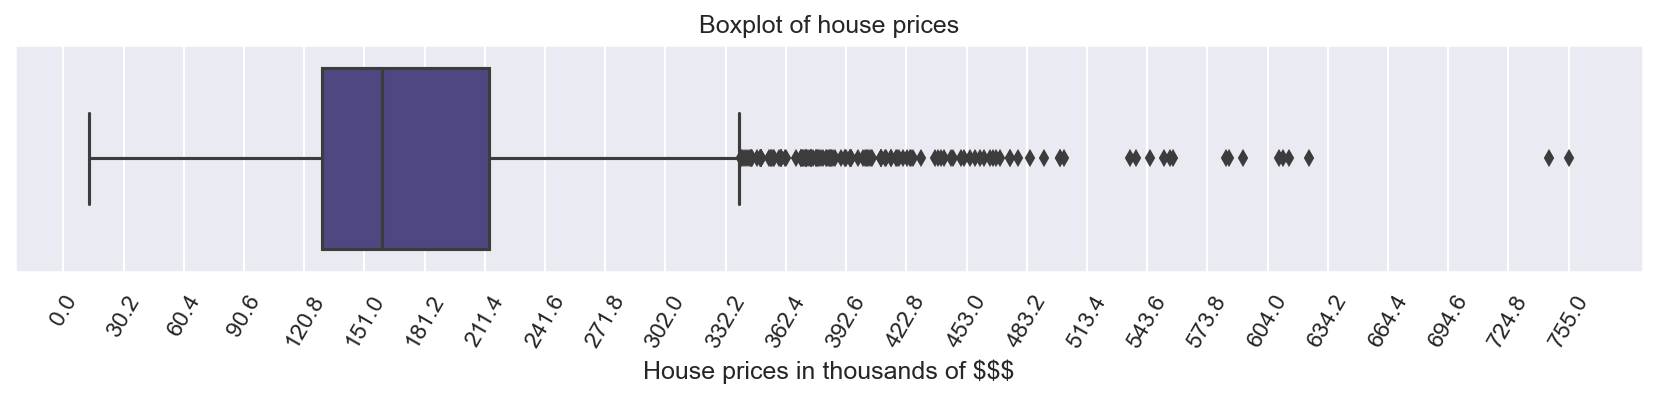

In [96]:
# boxplot to check the outliers designated by Q1 - 1.5xIQR and Q3 + 1.5xIQR 
# figure and ticks
plt.figure(figsize=(14,2), dpi=150)
tks = np.linspace(0,max(AmesDf['SalePrice']),26)
# plot itself
sns.boxplot(data=AmesDf, x='SalePrice', color=color)
plt.xlabel("House prices in thousands of $$$")
plt.title(" Boxplot of house prices ")
plt.xticks(ticks = tks, labels=tks/1000, rotation=60);

# we see that there may be many outliers, based on 1.5 x IQR 
# Especially there are 2 points near the 750k price - we will inspect them later

**Now we'll check the relation between 4 feats we picked earlier and labeled as potentially important.**

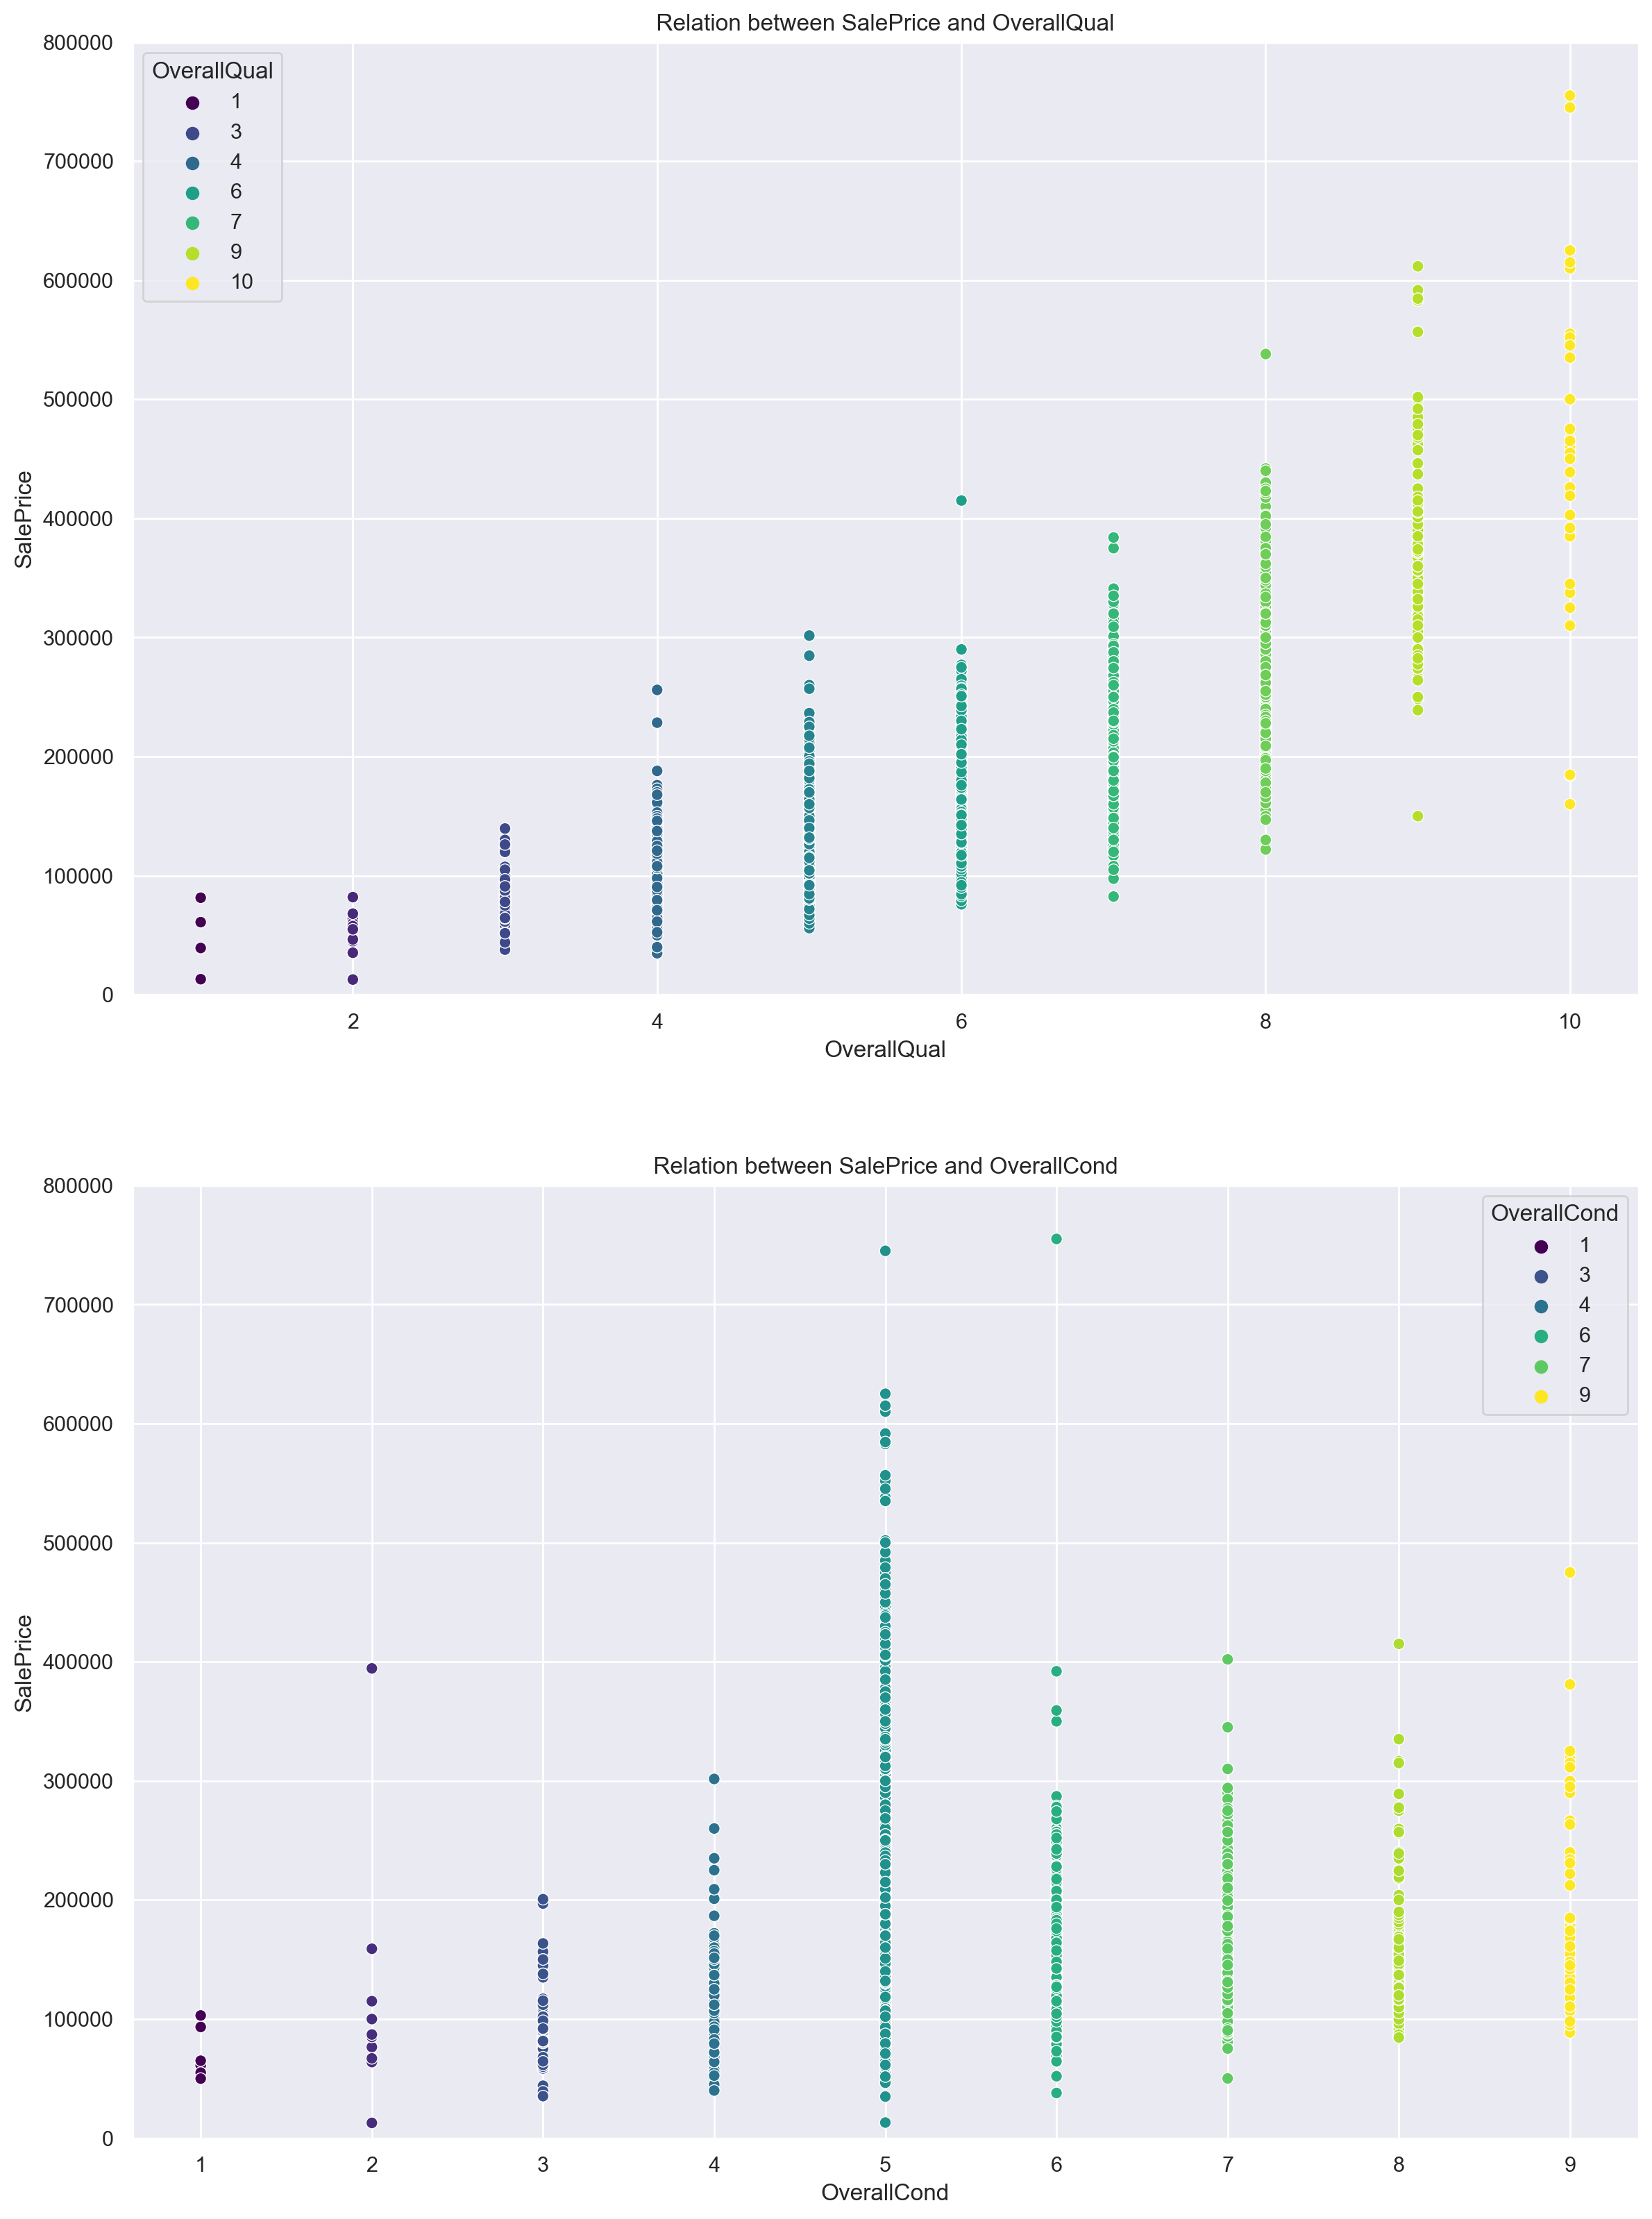

In [97]:
# setting
cols = ['OverallQual','OverallCond']
fig, ax = plt.subplots(len(cols),1,figsize=(14,20),dpi=200)

# Overal quall/cond
for i,x in enumerate(cols):
    #plot
    sns.scatterplot(y="SalePrice", data=AmesDf, ax=ax[i], x=x, hue=x, palette='viridis')
    ax[i].set_title(f" Relation between SalePrice and {x} ")
    ax[i].set_ylim(0,800000)

As we noticed earlier, there are 2 houses with really high price, now we see they best possible quality. (so maybe the price is reasonable)

There are also points that stand out: for quality 4,5,6, maybe 7,8 or 9 we can see points that are further than the rest.
On the other hand,  a few houses with quality 9 or 10 have with really low prices.

From the charts we can see, that **OverallQual has tendency to rise with SalePrice. In OverallCond that relation isn't that clear** (mainly due to a lot of houses with high variance of prices and condition 5). Let's check year of built.

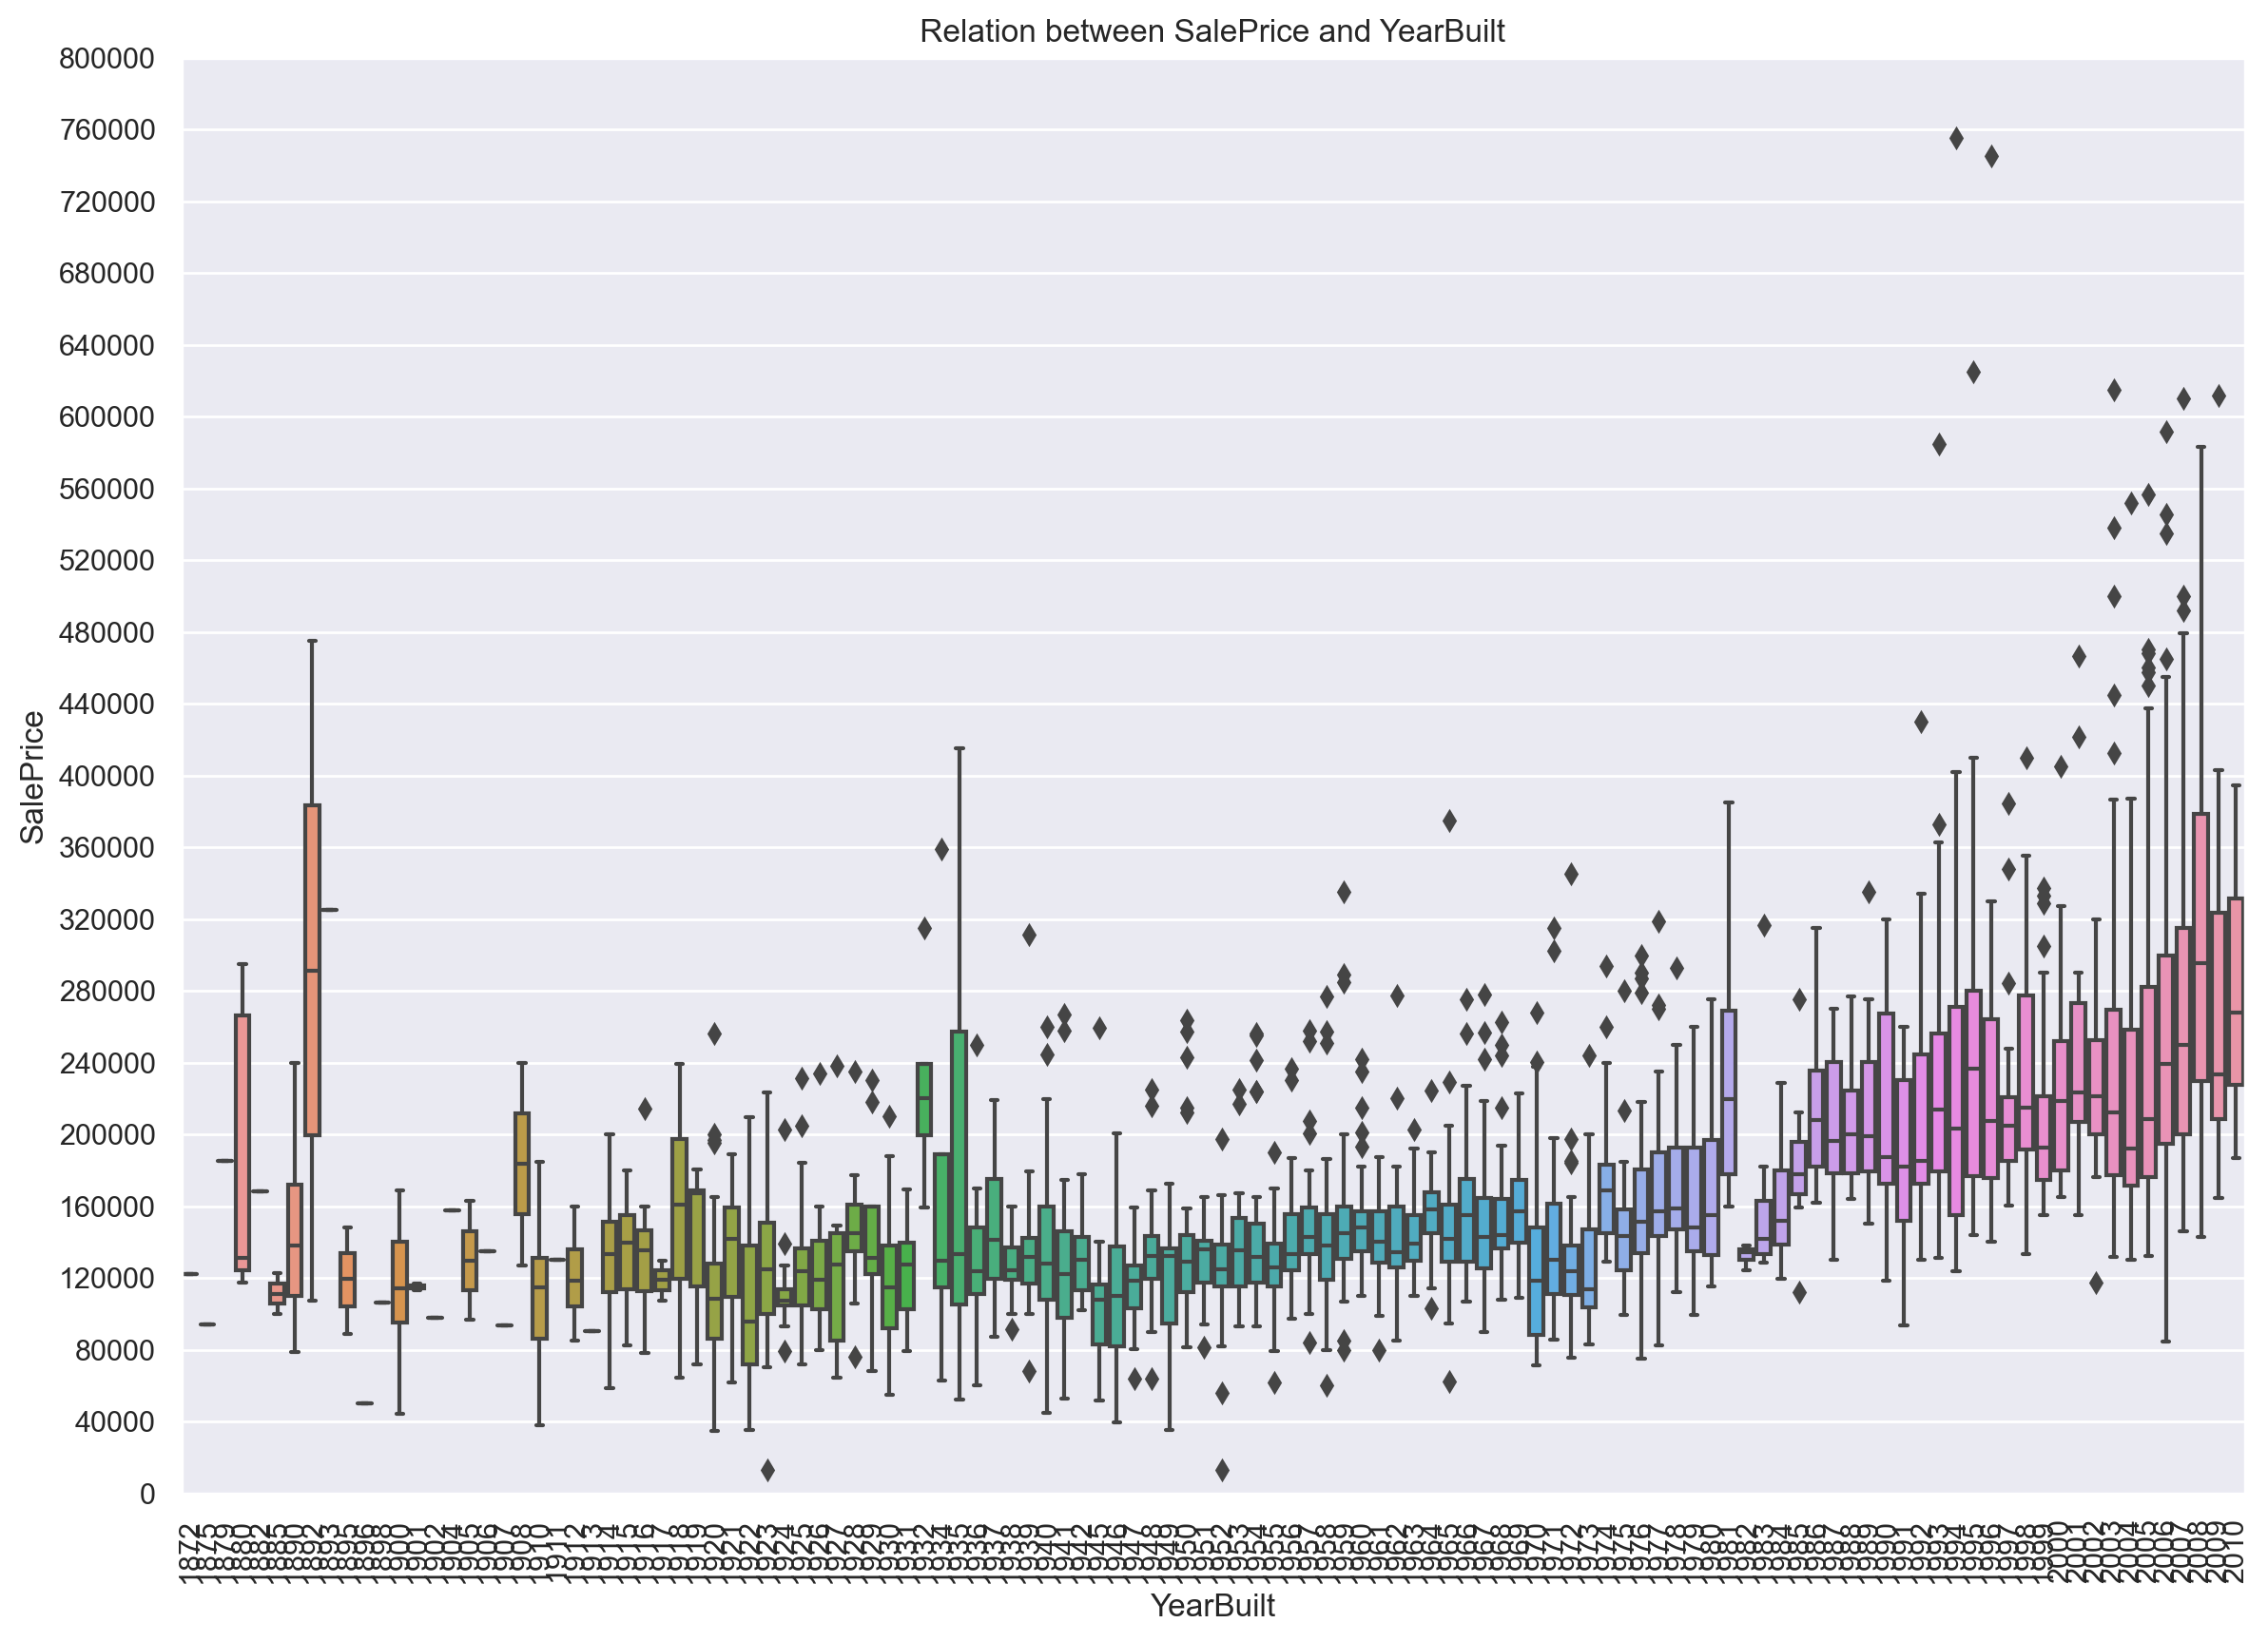

In [98]:
# YearBuilt
plt.figure(figsize=(14,10),dpi=200)
sns.boxplot(y="SalePrice", data=AmesDf, x='YearBuilt')
plt.title(f" Relation between SalePrice and YearBuilt ")
plt.ylim(0,800000)
plt.yticks(np.linspace(0,800000,21))
plt.xticks(rotation=90);

Here we can see some relation, as **generally price of house is higher for newer houses**, but there are years for which the price is really high.

In [99]:
#  might be due to very good overall quality and big living area
# first three rows show might be example of that
cols = ["SalePrice",'YearBuilt','OverallQual', 'GrLivArea']
AmesDf[AmesDf['YearBuilt']<1900].sort_values("SalePrice", ascending=False).loc[:,cols].head(7)

,SalePrice,YearBuilt,OverallQual,GrLivArea
2666,475000,1892,10,3608
1320,325000,1893,10,2775
1306,295000,1880,7,3493
716,265979,1880,7,2640
185,240000,1890,8,2268
1997,185000,1879,7,2454
1322,184000,1890,7,2495


Now let's check living area **(GrLivArea).**

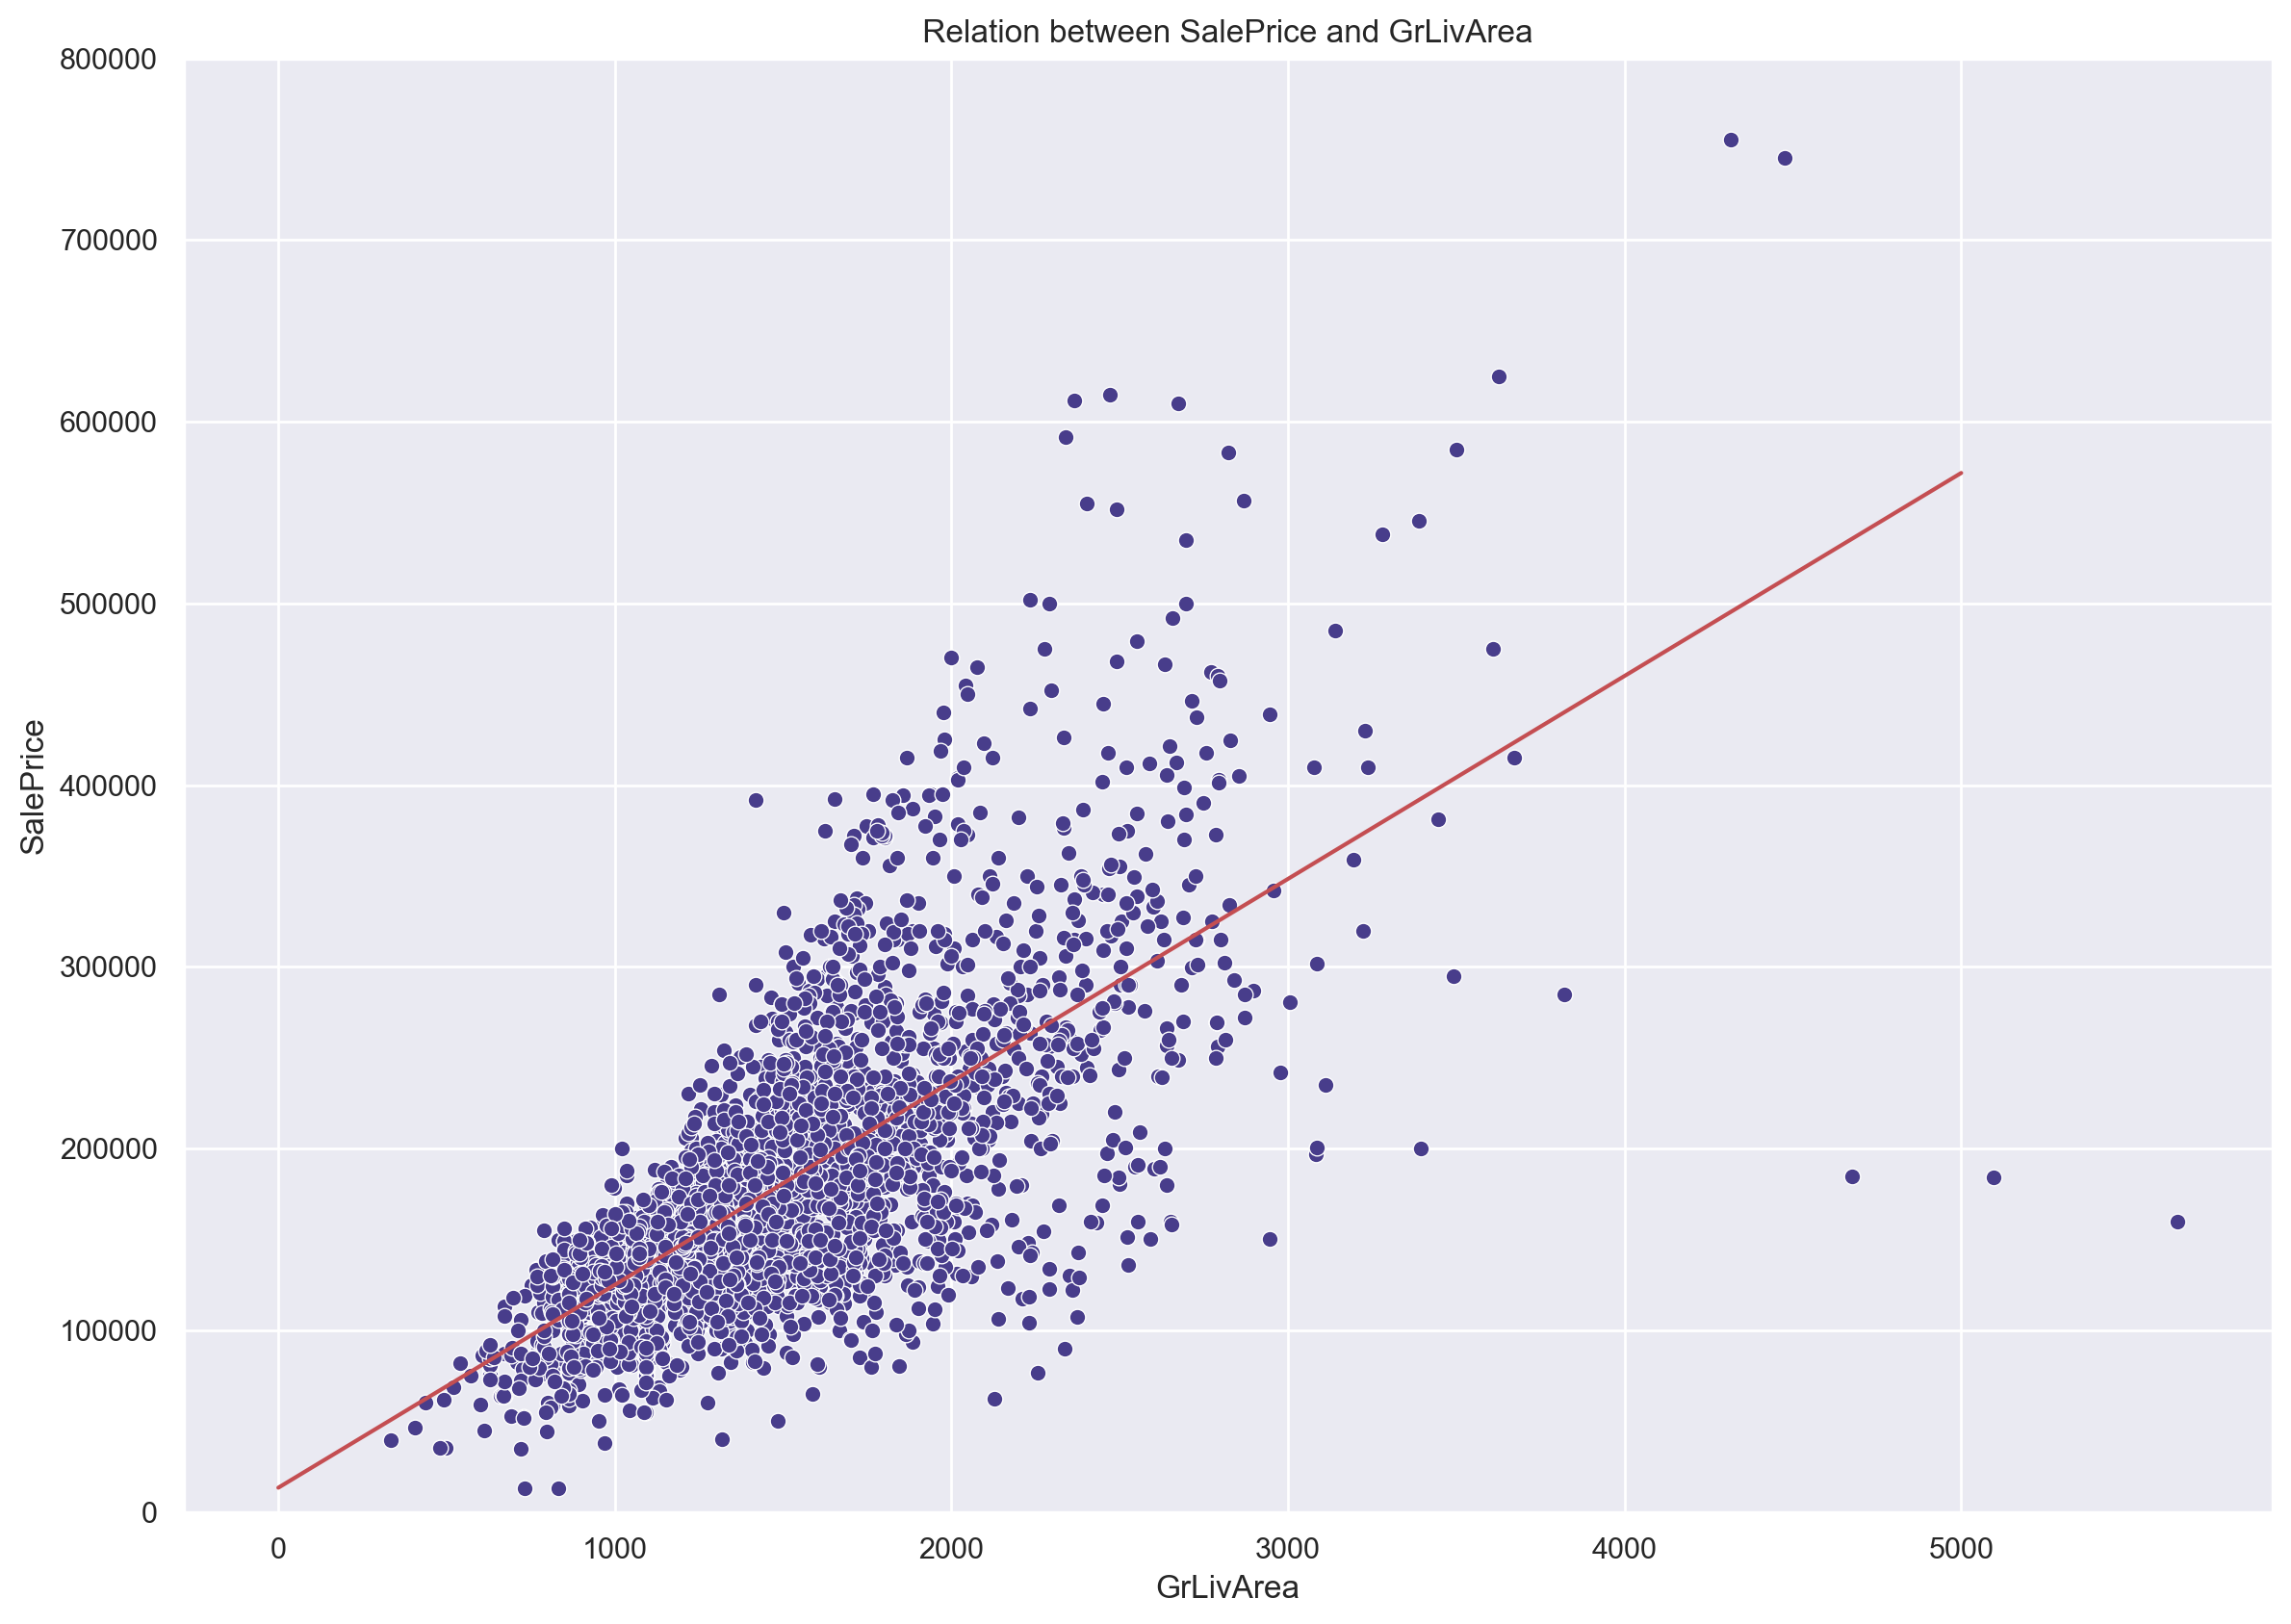

In [100]:
# Living area
# fit
m,b = np.polyfit(AmesDf["GrLivArea"], AmesDf['SalePrice'], 1)
# coefs
X_plot = np.linspace(0, 5000, 100)
Y_plot = m*X_plot+b
# plot
plt.figure(figsize=(14,10),dpi=200)
sns.scatterplot(y="SalePrice", data=AmesDf, x='GrLivArea', color=color)
plt.title(f" Relation between SalePrice and GrLivArea ")
plt.ylim(0,800000)
plt.plot(X_plot, Y_plot, color='r');

Clearly there's a relation between SalePrice and GrLivArea. Due to the fact, that SalePrice is right-skewed and we need to transform it, final dependence might be even simpler. We can also notice a few outliers around 5000 of GrLivArea.

In [101]:
with pd.option_context('display.max_columns', None):
    display(AmesDf[(AmesDf['GrLivArea']>4000)].loc[:,::-1])

,SalePrice,SaleCondition,SaleType,YrSold,MoSold,MiscVal,MiscFeature,Fence,PoolQC,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,GarageCond,GarageQual,GarageArea,GarageCars,GarageFinish,GarageYrBlt,GarageType,FireplaceQu,Fireplaces,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,Electrical,CentralAir,HeatingQC,Heating,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinType2,BsmtFinSF1,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrArea,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,YearRemod/Add,YearBuilt,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Alley,Street,LotArea,LotFrontage,MSZoning,MSSubClass
1498,160000,Partial,New,2008,1,0,NaN,NaN,Gd,480,0,0,0,292,214,Y,TA,TA,1418.0,2.0,Fin,2008.0,Attchd,Gd,3,Typ,12,Ex,1,3,1,2,0.0,2.0,5642,0,950,4692,SBrkr,Y,Ex,GasA,6110.0,466.0,0.0,Unf,5644.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,796.0,Stone,Stucco,Stucco,ClyTile,Hip,2008,2008,5,10,2Story,1Fam,Norm,Feedr,Edwards,Gtl,Corner,AllPub,Bnk,IR3,NaN,Pave,63887,313.0,RL,60
1760,745000,Abnorml,WD,2007,7,0,NaN,MnPrv,Ex,555,0,0,0,78,171,Y,TA,TA,813.0,3.0,Fin,1996.0,Attchd,TA,2,Typ,10,Ex,1,4,1,3,0.0,1.0,4476,0,2065,2411,SBrkr,Y,Ex,GasA,2396.0,300.0,0.0,Unf,2096.0,GLQ,Av,TA,Ex,PConc,TA,Gd,0.0,None,ImStucc,Wd Sdng,CompShg,Hip,1996,1996,5,10,2Story,1Fam,Norm,Norm,NoRidge,Gtl,Corner,AllPub,Lvl,IR1,NaN,Pave,15623,160.0,RL,60
1767,755000,Normal,WD,2007,1,0,NaN,NaN,NaN,0,0,0,0,50,382,Y,TA,TA,832.0,3.0,Fin,1994.0,Attchd,Ex,2,Typ,10,Ex,1,4,1,3,1.0,0.0,4316,0,1872,2444,SBrkr,Y,Ex,GasA,2444.0,989.0,0.0,Unf,1455.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,1170.0,BrkFace,HdBoard,HdBoard,WdShngl,Gable,1995,1994,6,10,2Story,1Fam,Norm,Norm,NoRidge,Gtl,Corner,AllPub,Lvl,IR1,NaN,Pave,21535,104.0,RL,60
2180,183850,Partial,New,2007,10,17000,Elev,NaN,NaN,0,0,0,0,484,546,Y,TA,TA,1154.0,3.0,Fin,2008.0,Attchd,Gd,2,Typ,15,Ex,1,2,1,2,1.0,1.0,5095,0,0,5095,SBrkr,Y,Ex,GasA,5095.0,1085.0,0.0,Unf,4010.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,1224.0,Stone,CmentBd,CemntBd,CompShg,Hip,2009,2008,5,10,1Story,1Fam,Norm,Norm,Edwards,Gtl,Inside,AllPub,Bnk,IR1,NaN,Pave,39290,128.0,RL,20
2181,184750,Partial,New,2007,10,0,NaN,NaN,NaN,0,0,0,0,406,208,Y,TA,TA,884.0,3.0,Fin,2007.0,BuiltIn,Gd,1,Typ,11,Ex,1,3,1,3,0.0,1.0,4676,0,1538,3138,SBrkr,Y,Ex,GasA,3138.0,878.0,0.0,Unf,2260.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,762.0,Stone,CmentBd,CemntBd,CompShg,Hip,2008,2007,5,10,2Story,1Fam,PosN,PosN,Edwards,Gtl,Inside,AllPub,Bnk,IR1,NaN,Pave,40094,130.0,RL,60


It's noticible, that this 3 houses has SaleCondition = Partial, which means that home was not completed when last assessed (associated with New Homes). 

It means that maybe if they are finished, the price will go up (so for now it may be better to remove them).
The other 2 houses might have that high price due to overal quality (10) and quite big living area. so we wont remove them.

In [102]:
# we save the indexes of these rows, so we drop it later
ind_drop = AmesDf[(AmesDf['GrLivArea']>4000) & (AmesDf['SalePrice']<400000)].index
ind_drop

Int64Index([1498, 2180, 2181], dtype='int64')

### Quick summary
As at the beggining we made some assumptions, that selected features will be important. 

* **OverallQual** has clearer and stronger relationship with SalePrice then **OverallCond**;
* **YearBuilt** seems to be related with price;
* **GrLivArea**  looks to be in positive linear relation with price.

There might be some outliers in the dataset, but we'll make check that later.
With that knowledge, let's start checking the correlated features and their distributions.

# 3. Exploring dependent variables

First and probably the simplest way to check relation between features is to plot a correlation matrix between them.

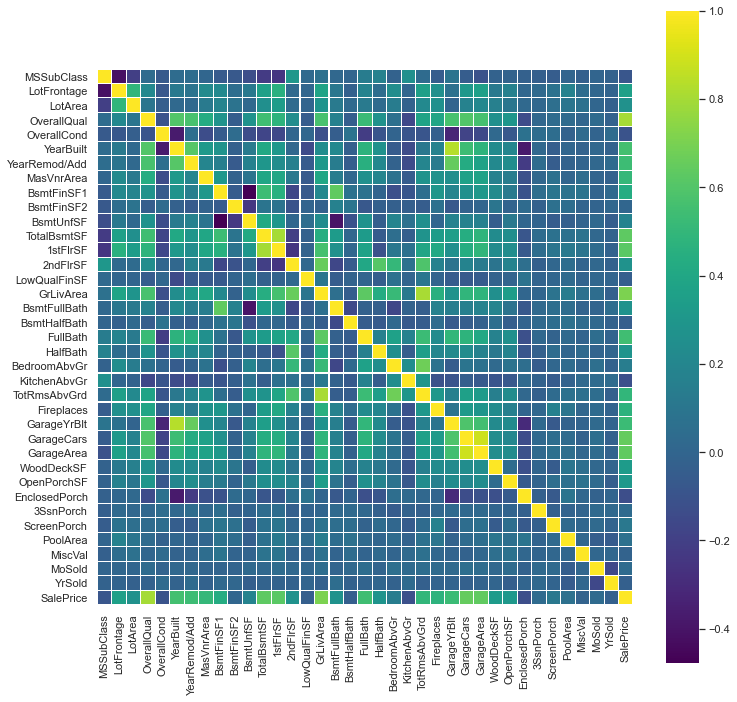

In [103]:
# correlation matrix
Cormat = AmesDf.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(Cormat, square=True, linewidths=.1,cmap='viridis');

It seems like all "Garage" features are strongly correlated, which leads to multicollinearity (Garage features have high correlation with SalePrice and between each other). We should probably remove some of this features to avoid reducion of precision of regression model.

Similar situation between:
* YearBuilt and GarageYrBlt (probably most houses were built with garage)
* YearBuilt and YearRemod/Add (remodel date is same as construction date if no remodeling or additions)
* GrLivArea and TotRmsAbvGrd (Total rooms above grade (does not include bathrooms, GrLivArea does))
* 1stFlrSF and TotalBsmntSF (usually the SF of basement = SF of 1st floor)

In [104]:
# matrix of SalePrice correlation 
SpCorr = Cormat['SalePrice'].sort_values(ascending=False)
SpCorr.head(15)

SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965
MasVnrArea       0.508285
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.432914
Name: SalePrice, dtype: float64

In [105]:
# we select features with absolute correlation higher that 0.5, so we can make a matrix of highly correlated features
cols = abs(Cormat[Cormat['SalePrice']>0.5])['SalePrice'].sort_values(ascending=False).index
print(f'Names of columns befpre dropping:\n{cols}')

# we drop GarageYrBlt and YearRemod/Add, as the YearBuilt is there. 
# we drop GarageArea because of having GarageCars and 1stFlrSF because we have GrLivArea
cols1 = cols.drop(['GarageYrBlt','GarageArea','1stFlrSF','YearRemod/Add'])
print(f'Names of columns after dropping:\n{cols1}')

Names of columns befpre dropping:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemod/Add',
       'GarageYrBlt', 'MasVnrArea'],
      dtype='object')
Names of columns after dropping:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'YearBuilt', 'FullBath', 'MasVnrArea'],
      dtype='object')


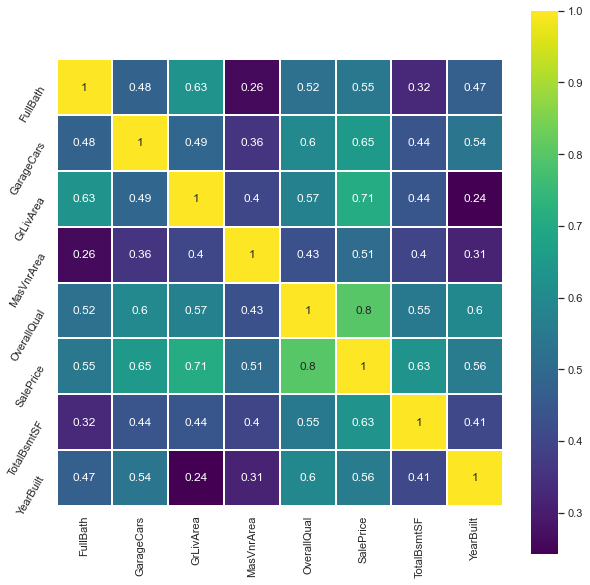

In [106]:
# Matrix of corelations for a selected columns
CormatShort  = Cormat[Cormat.index.isin(cols1)][cols1].sort_index(ascending=True)
CormatShort = CormatShort.reindex(sorted(CormatShort.columns), axis=1)

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(CormatShort, square=True, linewidths=1, annot=True, cmap='viridis')
plt.yticks(rotation=60);

Following early assumptions, selected features (**OverallQual,YearBuilt,GrLivArea**) are correlated with price strongly.

Also we can see that SalePrice has strong correlation with:
* GarageCars;
* TotalBmntSF - total square footage of basement;
* 1stFlrSF - square footage of first floor; 
* FullBath - number of full baths.

**Let's plot some of this relations**

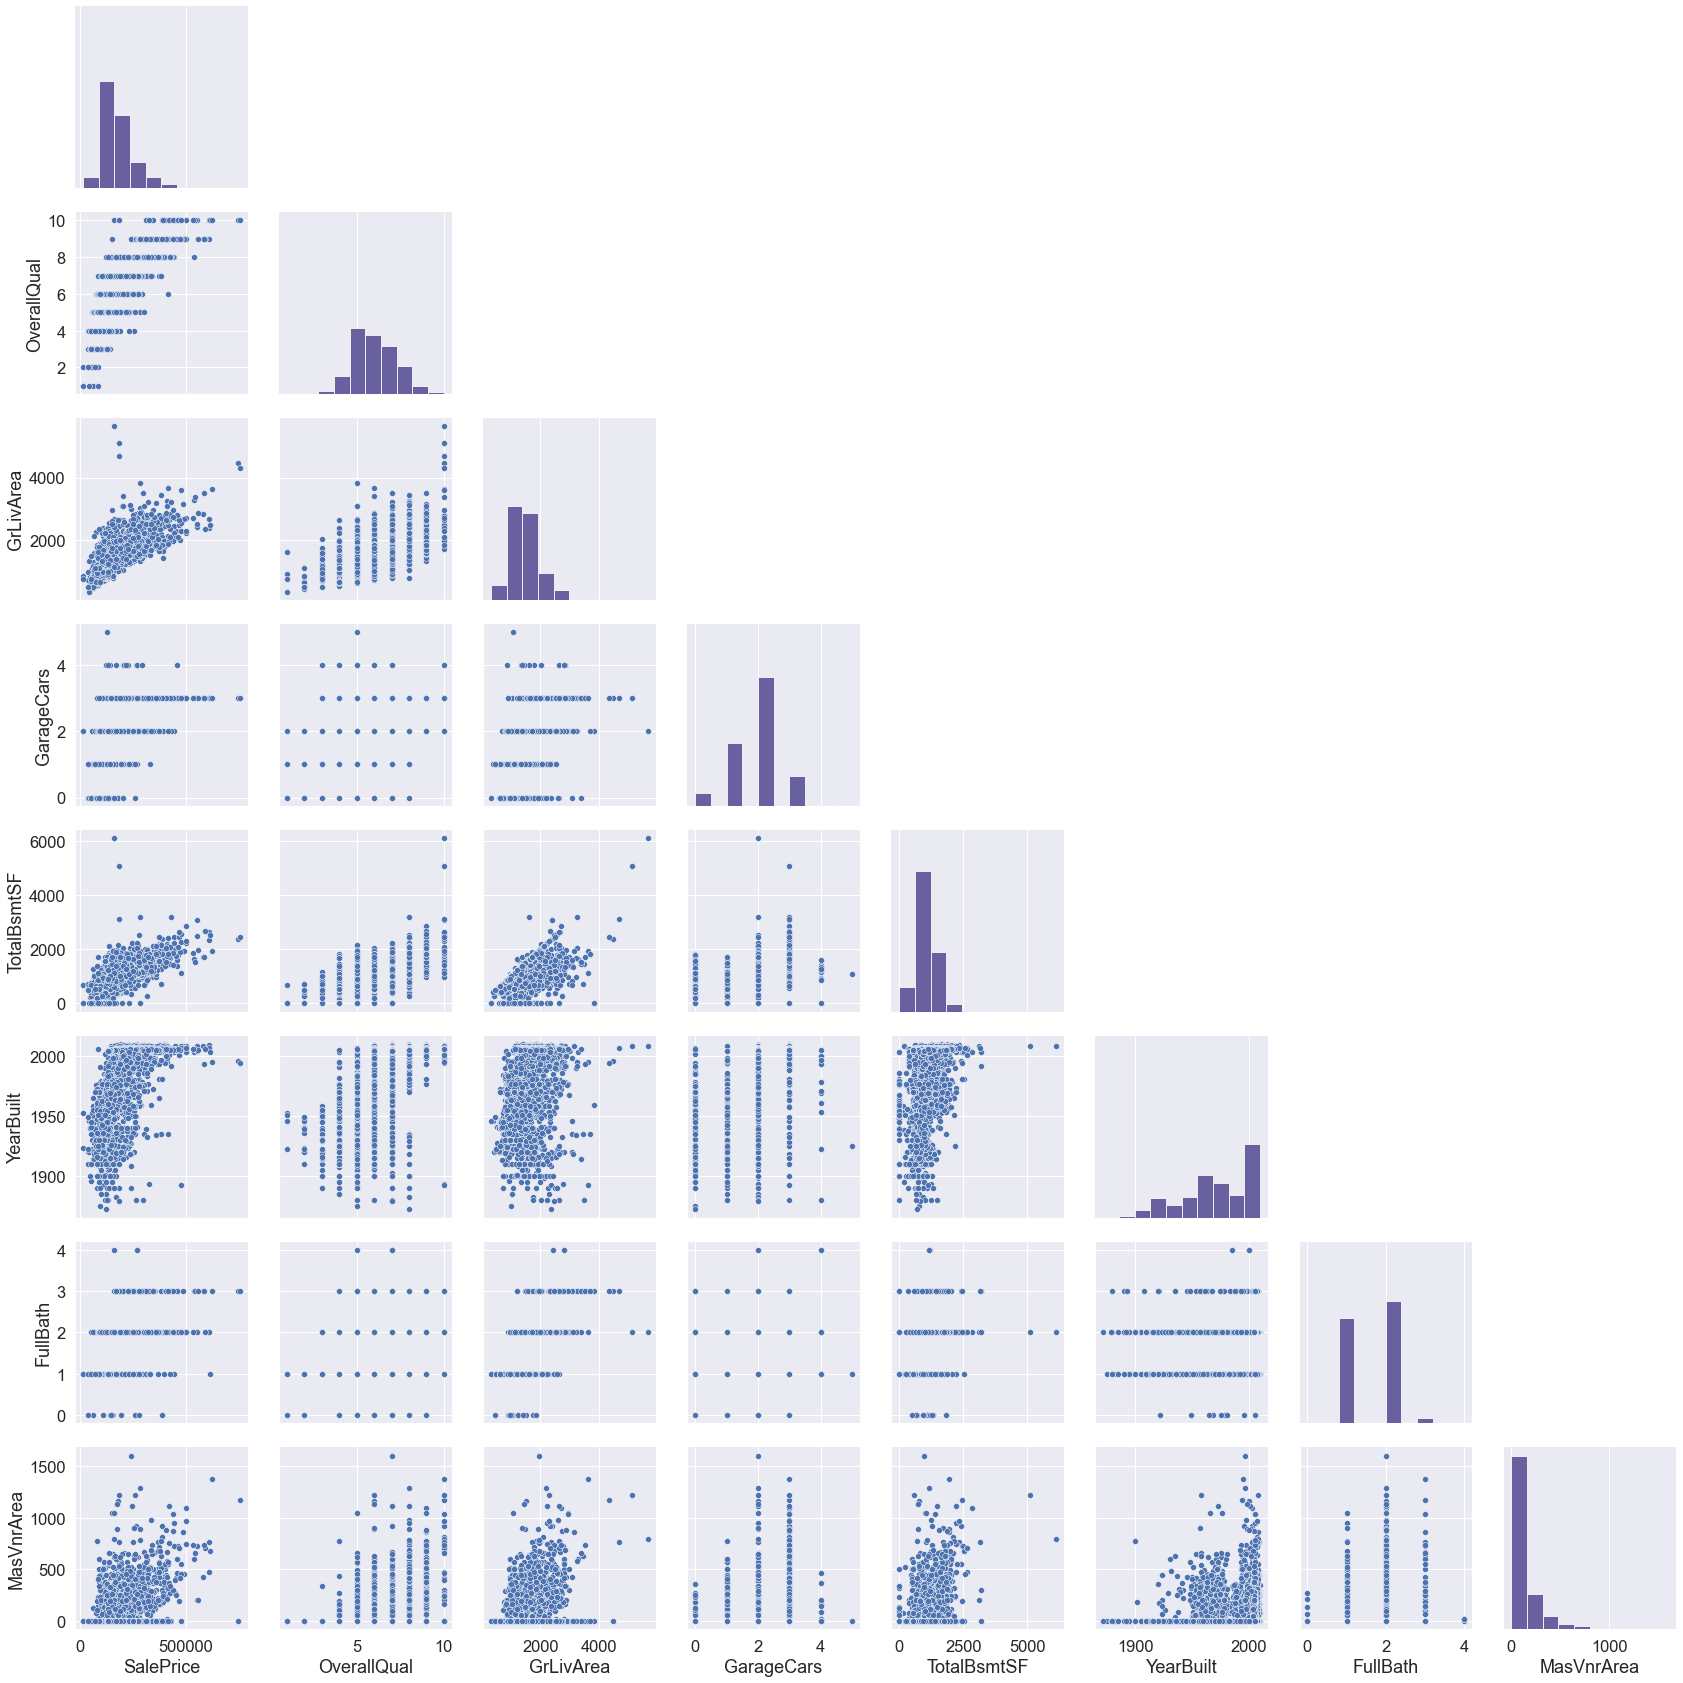

In [107]:
# set higher scale
sns.set(font_scale = 1.5)
# pairplot
g = sns.PairGrid(AmesDf[cols1],height=3, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(plt.hist, color=color, alpha=0.8)
plt.show();
# set back
sns.set(font_scale = 1)

###  Quick summary:

* features describing area has similar relation to sale price;
* mostly price rise with better overal quallity;
* newer houses usually has higher prices;
* to a certain amount, more garages means higher price;
* more bathrooms also on average means higher price;
* a lot of 0 for MasVnrArea.

 We can also notice the outliers which we'll exactly detect in a moment.

# 4. Data preprocessing and feature engineering.

### Here we'll take care of

* missing values, 
* checks skewness and transform some columns
* outliers, 
* simplify categorical data, 
* create some new features.

## Let's start with missing values.

From decription file, we can notice that NA are used, when for example there is basement, pool or fireplace. That's a big hint in dealing with missing values.

We will also  define simple func, to make it easier

In [173]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

def plot_missing(ser, x=None):
    # barplot of missing values
    plt.figure(figsize=(14,6))
    sns.barplot(x=ser.index,y=ser, palette='viridis')
    plt.ylabel(' Percent of missing values')
    plt.xlabel(' Feature ')
    plt.title(' Missing values in AmesDf shown in %%% ')
    plt.xticks(rotation=90)
    plt.ylim(0,x);

In [174]:
# we create a series for plot
PercentNan = percent_missing(AmesDf)

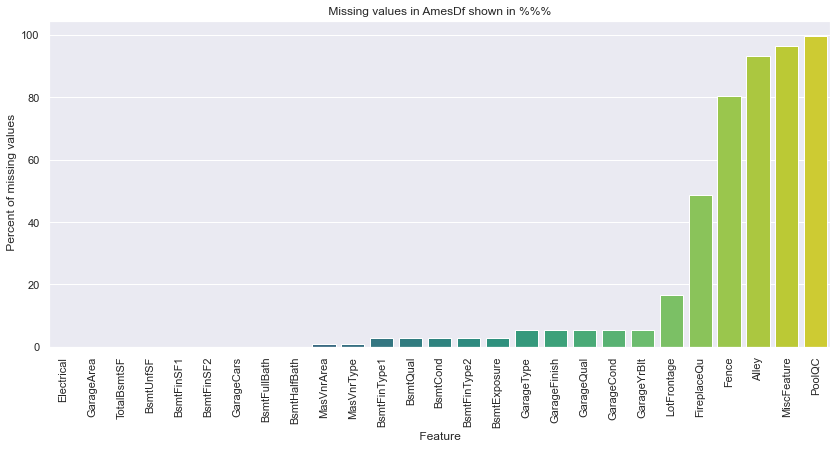

In [175]:
plot_missing(PercentNan)

We see, that some features has quite low percentage of missing values, so it might be a good idea to try to fill them. On the other hand, last 4 features has over 80% of missing data, so we'll consider to drop them.

**Let's start with low % of missing values features.**

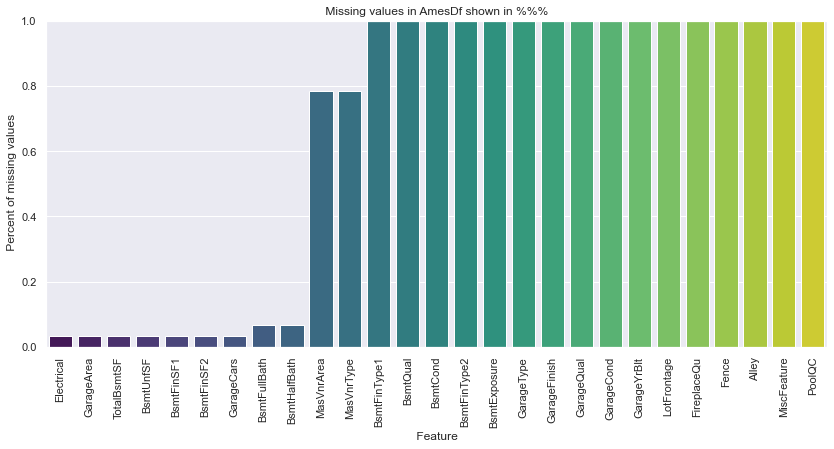

In [176]:
plot_missing(PercentNan, 1)

In [177]:
# features with less missing values then 1%
LessTn1 = PercentNan[PercentNan < 1]
LessTn1
# first 7 features has very few missing values

Electrical      0.034130
GarageArea      0.034130
TotalBsmtSF     0.034130
BsmtUnfSF       0.034130
BsmtFinSF1      0.034130
BsmtFinSF2      0.034130
GarageCars      0.034130
BsmtFullBath    0.068259
BsmtHalfBath    0.068259
MasVnrArea      0.784983
MasVnrType      0.784983
dtype: float64

In [178]:
# 1 row as a percentage of all df
100/len(AmesDf)
# we see that first 7 feats has missing value in 1 row, maybe even the same row

0.034129692832764506

As mentioned earlier, NA means that there is no basement/fireplace etc, so we'll fill them with 0/None depending on the type of data. The missing value in Electrital could be replaced, but i'll drop it (null doesn't mean no electical :) ).

In [179]:
# copy of amesdf
AmesDfNN = AmesDf.copy()

**NULLS < 1%**

In [180]:
LessTn1[LessTn1.index!='Electrical'].index

Index(['GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2',
       'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea',
       'MasVnrType'],
      dtype='object')

In [185]:
# num cols
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
                  'BsmtFullBath', 'BsmtHalfBath','GarageArea', 'MasVnrArea']
AmesDfNN[bsmt_num_cols] = AmesDfNN[bsmt_num_cols].fillna(0)

In [186]:
# cat cols
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'GarageCars','MasVnrType']
AmesDfNN[bsmt_str_cols] = AmesDfNN[bsmt_str_cols].fillna('None')

In [187]:
# Electrical
AmesDfNN = AmesDfNN.dropna(axis=0,subset= ['Electrical'])

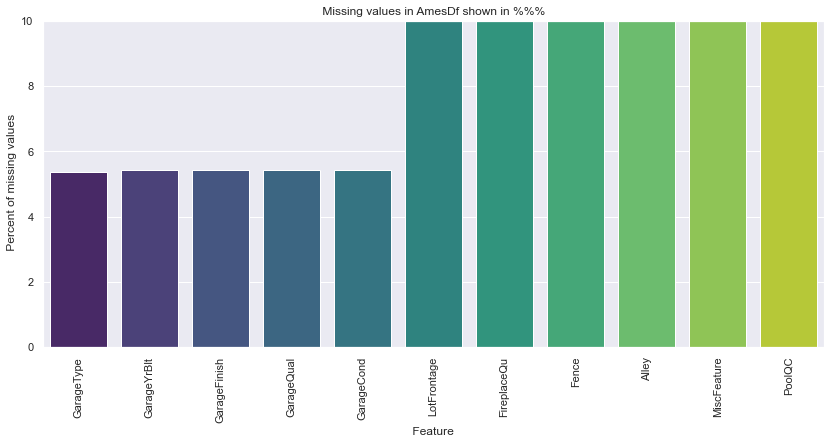

In [190]:
# re-check nulls
PercentNan = percent_missing(AmesDfNN)
plot_missing(PercentNan,10)

**Garage columns**

We fill NA same as earlier, by imputing 0/None.

In [192]:
GrgCols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
AmesDfNN[GrgCols] = AmesDfNN[GrgCols].fillna('None')

In [193]:
AmesDfNN['GarageYrBlt'] = AmesDfNN['GarageYrBlt'].fillna(0)

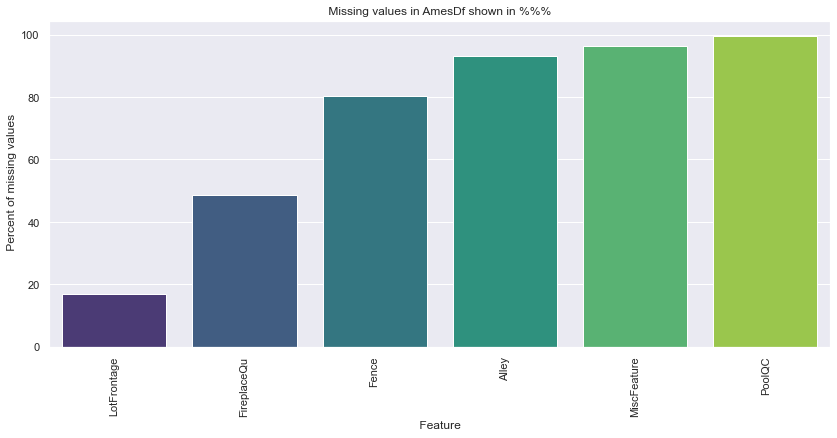

In [194]:
PercentNan = percent_missing(AmesDfNN)
plot_missing(PercentNan)

From description.txt we can read that PoolQC, MiscFeature, Alley and Fence are filled with NA if there is none. We could fill there *None* but we'll drop these colums, as probably they won't be that meaningful for predicting.

In [195]:
AmesDfNN = AmesDfNN.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

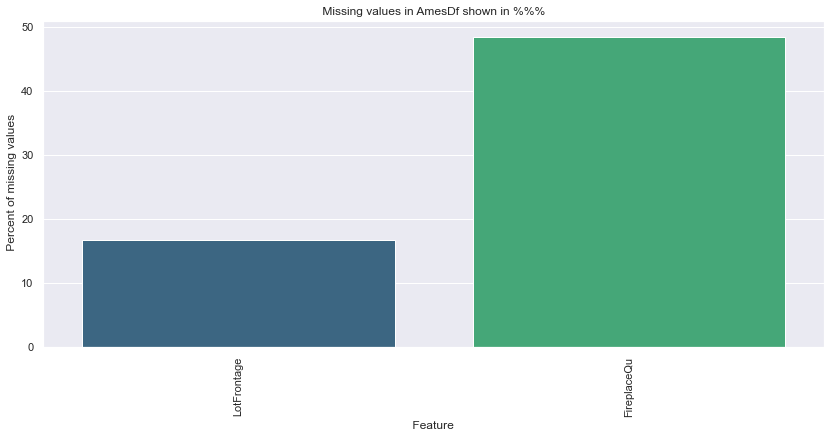

In [196]:
PercentNan = percent_missing(AmesDfNN)
plot_missing(PercentNan)

In [198]:
# fill with none, as in this houses is no Fireplace
AmesDfNN['FireplaceQu'] = AmesDfNN['FireplaceQu'].fillna("None")

**Imputing LotFrontage**

In dealing with missing values in LotFrontage, will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

Neighborhood: Physical locations within Ames city limits.

LotFrontage: Linear feet of street connected to property.



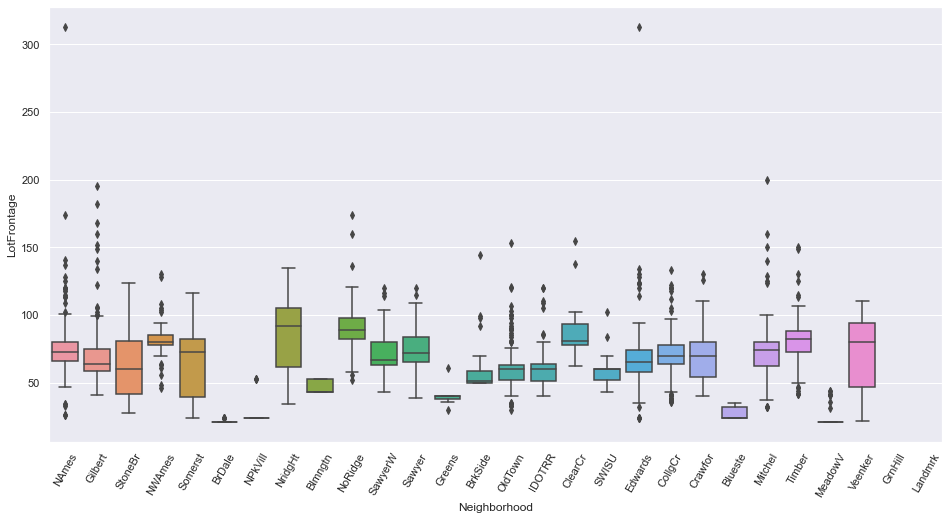

In [207]:
plt.figure(figsize=(16,8))
sns.boxplot(y='LotFrontage',x='Neighborhood',data=AmesDfNN)
plt.xticks(rotation=60);

We will use median of LotFrontage for each Neighborhood to fill the missing values.

In [208]:
# so here we group by Neighborhood, then get LotFrontage, and fill with median
AmesDfNN['LotFrontage'] = AmesDfNN.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [210]:
PercentNan = percent_missing(AmesDfNN)
PercentNan

LotFrontage    0.102424
dtype: float64

In [213]:
# for the rest, that seems to not have Neighborhood, we'll fill with 0
AmesDfNN['LotFrontage'] = AmesDfNN['LotFrontage'].fillna(0)

In [214]:
# No missing values left
percent_missing(AmesDfNN)

Series([], dtype: float64)

In [ ]:
Outliars

In [72]:
# In part 2 we found 3 rows, that we decided to drop.
with pd.option_context('display.max_columns', None):
    display(AmesDf.iloc[ind_drop].loc[:,::-1])

,SalePrice,SaleCondition,SaleType,YrSold,MoSold,MiscVal,MiscFeature,Fence,PoolQC,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,GarageCond,GarageQual,GarageArea,GarageCars,GarageFinish,GarageYrBlt,GarageType,FireplaceQu,Fireplaces,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,Electrical,CentralAir,HeatingQC,Heating,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinType2,BsmtFinSF1,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrArea,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,YearRemod/Add,YearBuilt,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Alley,Street,LotArea,LotFrontage,MSZoning,MSSubClass
1498,160000,Partial,New,2008,1,0,NaN,NaN,Gd,480,0,0,0,292,214,Y,TA,TA,1418.0,2.0,Fin,2008.0,Attchd,Gd,3,Typ,12,Ex,1,3,1,2,0.0,2.0,5642,0,950,4692,SBrkr,Y,Ex,GasA,6110.0,466.0,0.0,Unf,5644.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,796.0,Stone,Stucco,Stucco,ClyTile,Hip,2008,2008,5,10,2Story,1Fam,Norm,Feedr,Edwards,Gtl,Corner,AllPub,Bnk,IR3,NaN,Pave,63887,313.0,RL,60
2180,183850,Partial,New,2007,10,17000,Elev,NaN,NaN,0,0,0,0,484,546,Y,TA,TA,1154.0,3.0,Fin,2008.0,Attchd,Gd,2,Typ,15,Ex,1,2,1,2,1.0,1.0,5095,0,0,5095,SBrkr,Y,Ex,GasA,5095.0,1085.0,0.0,Unf,4010.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,1224.0,Stone,CmentBd,CemntBd,CompShg,Hip,2009,2008,5,10,1Story,1Fam,Norm,Norm,Edwards,Gtl,Inside,AllPub,Bnk,IR1,NaN,Pave,39290,128.0,RL,20
2181,184750,Partial,New,2007,10,0,NaN,NaN,NaN,0,0,0,0,406,208,Y,TA,TA,884.0,3.0,Fin,2007.0,BuiltIn,Gd,1,Typ,11,Ex,1,3,1,3,0.0,1.0,4676,0,1538,3138,SBrkr,Y,Ex,GasA,3138.0,878.0,0.0,Unf,2260.0,GLQ,Gd,TA,Ex,PConc,TA,Ex,762.0,Stone,CmentBd,CemntBd,CompShg,Hip,2008,2007,5,10,2Story,1Fam,PosN,PosN,Edwards,Gtl,Inside,AllPub,Bnk,IR1,NaN,Pave,40094,130.0,RL,60


In [79]:
# dummy vars


# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error

# def df_mae_check(df):
#     # create X and y
#     X, y = df.drop(columns='SalePrice'), df['SalePrice']
#     # train and test split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#     # fit the model
#     m = LinearRegression()
#     m.fit(X_train, y_train)
#     # evaluate the model
#     yhat = m.predict(X_test)
#     # evaluate predictions
#     mae = mean_absolute_error(y_test, yhat)
#     print(f'MAE: {mae}.4f')

In [73]:
AmesDf = AmesDf.drop(ind_drop,axis=0)